In [1]:
!pip install tensorflow
!pip install opencv.python
!pip install opencv.contrib.python
!pip install numpy pandas matplotlib tensorflow keras 

In [12]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import os
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import json

In [18]:
import zipfile
#!pip install zipfile

path = r"C:\Users\Hari Priya\Downloads"

In [22]:
with zipfile.ZipFile('archive (1).zip') as zip_ref:
    zip_ref.extractall('forest_fire')

In [17]:
# To Testing and Training the data set
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255) 

train_dataset = train.flow_from_directory("C:/Users/Hari Priya/Downloads/archive (1)/forest_fire/Training and Validation/",
                                         target_size=(150,150),
                                         batch_size = 32,
                                         class_mode = 'binary')

test_dataset = test.flow_from_directory("C:/Users/Hari Priya/Downloads/archive (1)/forest_fire/Testing/",
                                         target_size=(150,150),
                                         batch_size = 32,
                                         class_mode = 'binary')

Found 1832 images belonging to 2 classes.
Found 68 images belonging to 2 classes.


In [11]:
# To Build Machine Learning Model 
# A Simple CNN Model for binary classification(fire vs. no fire)
model = keras.Sequential()
model.add(keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(128,(3,3),activation='relu'))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(512,activation='relu'))
model.add(keras.layers.Dense(1,activation='sigmoid'))

In [20]:
# To Compile the Model
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [21]:
# To fit the Model
r = model.fit(train_dataset, epochs = 6,validation_data = test_dataset)

Epoch 1/6
58/58 ━━━━━━━━━━━━━━━━━━━━ 28s 408ms/step - accuracy: 0.7791 - loss: 0.5467 - val_accuracy: 0.7500 - val_loss: 0.6194
Epoch 2/6
58/58 ━━━━━━━━━━━━━━━━━━━━ 23s 400ms/step - accuracy: 0.9400 - loss: 0.1964 - val_accuracy: 0.9265 - val_loss: 0.2813
Epoch 3/6
58/58 ━━━━━━━━━━━━━━━━━━━━ 23s 394ms/step - accuracy: 0.9524 - loss: 0.1578 - val_accuracy: 0.8824 - val_loss: 0.2804
Epoch 4/6
58/58 ━━━━━━━━━━━━━━━━━━━━ 23s 398ms/step - accuracy: 0.9640 - loss: 0.1154 - val_accuracy: 0.8235 - val_loss: 0.3496
Epoch 5/6
58/58 ━━━━━━━━━━━━━━━━━━━━ 24s 410ms/step - accuracy: 0.9743 - loss: 0.0857 - val_accuracy: 0.9118 - val_loss: 0.1899
Epoch 6/6
58/58 ━━━━━━━━━━━━━━━━━━━━ 24s 405ms/step - accuracy: 0.9795 - loss: 0.0739 - val_accuracy: 0.9412 - val_loss: 0.1713


In [22]:
predictions = model.predict(test_dataset)
predictions = np.round(predictions)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 190ms/step


In [24]:
# Represent fire or no fire
predictions

array([[1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [1.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [1.],
       [0.],
       [0.],
       [1.]], dtype=float32)

In [25]:
print(len(predictions))

68


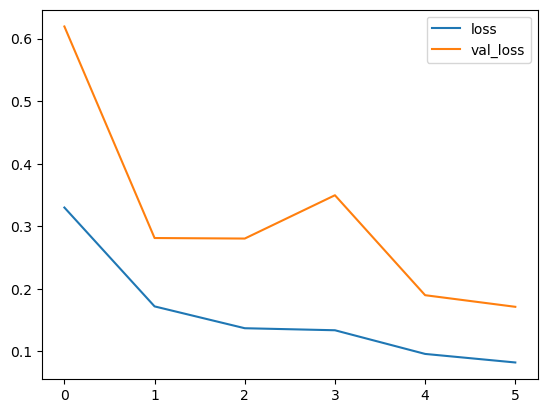

In [27]:
# Plotting loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'],label='loss')
plt.plot(r.history['val_loss'],label='val_loss')
plt.legend()

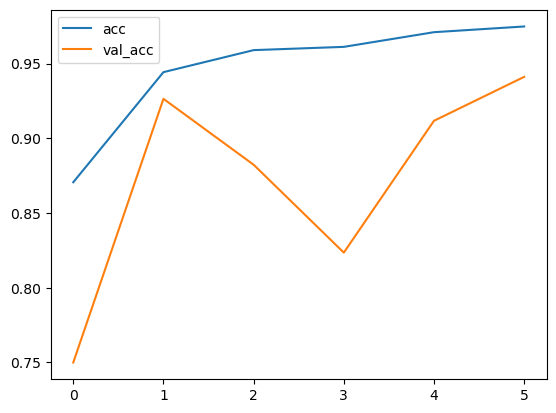

In [28]:
# Plotting Accuracy
plt.plot(r.history['accuracy'],label='acc')
plt.plot(r.history['val_accuracy'],label='val_acc')
plt.legend()

In [29]:
# Helps in taking induvidual images fromthe Dataset, load and check results
def predictImage(filename):
    img1 = image.load_img(filename,target_size=(150,150))
    plt.imshow(img1)
    Y = image.img_to_array(img1)
    X = np.expand_dims(Y,axis=0)
    val = model.predict(X)
    print(val)
    if val == 1:
        plt.xlabel("No Fire",fontsize=30)
    elif val == 0:
        plt.xlabel("Fire",fontsize=30)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step
[[0.]]


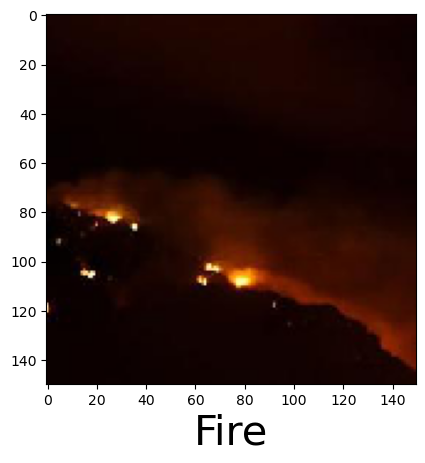

In [30]:
predictImage("C:/Users/Hari Priya/Downloads/archive (1)/forest_fire/Testing/fire/abc172.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
[[0.]]


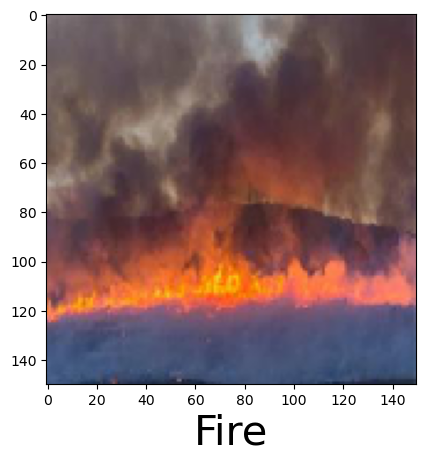

In [31]:
predictImage("C:/Users/Hari Priya/Downloads/archive (1)/forest_fire/Testing/fire/abc178.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
[[1.]]


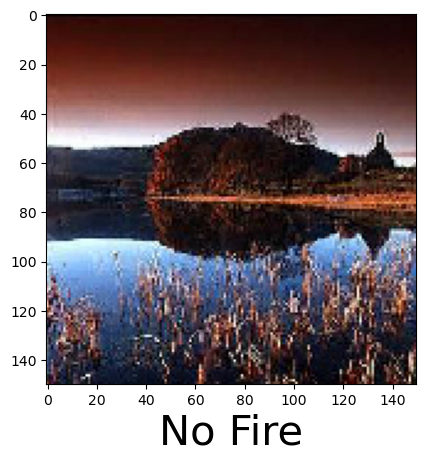

In [33]:
predictImage("C:/Users/Hari Priya/Downloads/archive (1)/forest_fire/Testing/nofire/abc367.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
[[1.]]


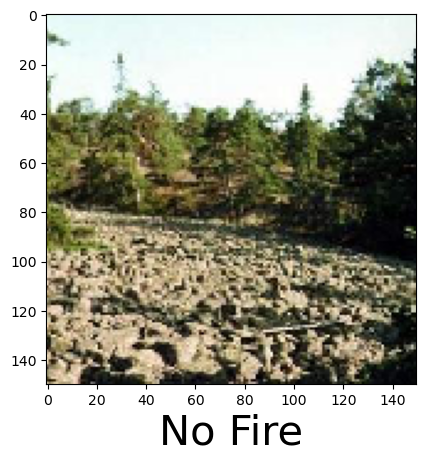

In [34]:
predictImage("C:/Users/Hari Priya/Downloads/archive (1)/forest_fire/Testing/nofire/abc369.jpg")